In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
file_path = '/content/drive/My Drive/CSDL/data_house_NewCastl.csv'
df= pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Hiển thị 15 dòng đầu tiên
print(df.head(15))


         Area  BHK  Bathroom      Furnishing                                           Locality  Parking     Price         Status
0    800.0000    3       2.0  Semi-Furnished                                   Rohini Sector 25      1.0   6500000  Ready_to_move
1    750.0000    2       2.0  Semi-Furnished             J R Designers Floors, Rohini Sector 24      1.0   5000000  Ready_to_move
2    950.0000    2       2.0       Furnished                Citizen Apartment, Rohini Sector 13      1.0  15500000  Ready_to_move
3    600.0000    2       2.0  Semi-Furnished                                   Rohini Sector 24      1.0   4200000  Ready_to_move
4    650.0000    2       2.0  Semi-Furnished  Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000  Ready_to_move
5   1300.0000    4       3.0  Semi-Furnished                                   Rohini Sector 24      1.0  15500000  Ready_to_move
6   1350.0000    4       3.0  Semi-Furnished                                   Rohini Sect

In [24]:
data = pd.read_csv(file_path)
num_rows, num_cols = data.shape
print(f"Số hàng: {num_rows}")
print(f"Số cột: {num_cols}")

Số hàng: 1259
Số cột: 8


In [25]:
missing_values = data.isnull().sum()
print(missing_values)

# Hiển thị tổng số giá trị còn thiếu
total_missing = missing_values.sum()
print(f"Tổng số giá trị còn thiếu: {total_missing}")

Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Parking       33
Price          0
Status         0
dtype: int64
Tổng số giá trị còn thiếu: 40


In [26]:
# Kiểm tra số lượng giá trị bằng 0 trong mỗi cột
zero_counts = (df == 0).sum()

# Kiểm tra số lượng giá trị thiếu (NaN) trong mỗi cột
nan_counts = df.isna().sum()

# Hiển thị các cột có giá trị bằng 0 hoặc thiếu giá trị
print("Số lượng giá trị bằng 0 trong mỗi cột:")
print(zero_counts)
print("\nSố lượng giá trị thiếu (NaN) trong mỗi cột:")
print(nan_counts)

Số lượng giá trị bằng 0 trong mỗi cột:
Area          0
BHK           0
Bathroom      0
Furnishing    0
Locality      0
Parking       0
Price         0
Status        0
dtype: int64

Số lượng giá trị thiếu (NaN) trong mỗi cột:
Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Parking       33
Price          0
Status         0
dtype: int64


In [27]:
df.dropna(axis=0, inplace=True)  # Loại bỏ các hàng chứa giá trị thiếu
df = df.drop(columns=['Locality'])

print("\nDataFrame sau khi xóa cột '':\n", df)


DataFrame sau khi xóa cột '':
          Area  BHK  Bathroom      Furnishing  Parking     Price         Status
0       800.0    3       2.0  Semi-Furnished      1.0   6500000  Ready_to_move
1       750.0    2       2.0  Semi-Furnished      1.0   5000000  Ready_to_move
2       950.0    2       2.0       Furnished      1.0  15500000  Ready_to_move
3       600.0    2       2.0  Semi-Furnished      1.0   4200000  Ready_to_move
4       650.0    2       2.0  Semi-Furnished      1.0   6200000  Ready_to_move
...       ...  ...       ...             ...      ...       ...            ...
1254   4118.0    4       5.0     Unfurnished      3.0  55000000  Ready_to_move
1255   1050.0    3       2.0  Semi-Furnished      3.0  12500000  Ready_to_move
1256    875.0    3       3.0  Semi-Furnished      3.0  17500000  Ready_to_move
1257    990.0    2       2.0     Unfurnished      1.0  11500000  Ready_to_move
1258  11050.0    3       3.0     Unfurnished      1.0  18500000  Ready_to_move

[1225 rows x 7 colu

In [28]:
# Đo lường các thống kê mô tả của bảng dữ liệu
stats = df.describe()
print(stats)

               Area          BHK     Bathroom      Parking         Price
count   1225.000000  1225.000000  1225.000000  1225.000000  1.225000e+03
mean    1473.558351     2.800816     2.568163     1.936327  2.141555e+07
std     1584.440935     0.948597     1.039481     6.281719  2.580663e+07
min       28.000000     1.000000     1.000000     1.000000  1.000000e+06
25%      807.292500     2.000000     2.000000     1.000000  5.650000e+06
50%     1200.000000     3.000000     2.000000     1.000000  1.430000e+07
75%     1700.000000     3.000000     3.000000     2.000000  2.550000e+07
max    24300.000000    10.000000     7.000000   114.000000  2.400000e+08


In [ ]:
print(df.dtypes)


Area          float64
BHK             int64
Bathroom      float64
Furnishing      int64
Parking       float64
Price           int64
Status         object
dtype: object


<ipython-input-7-9437876d529e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


Text(0, 0.5, 'Tần số')

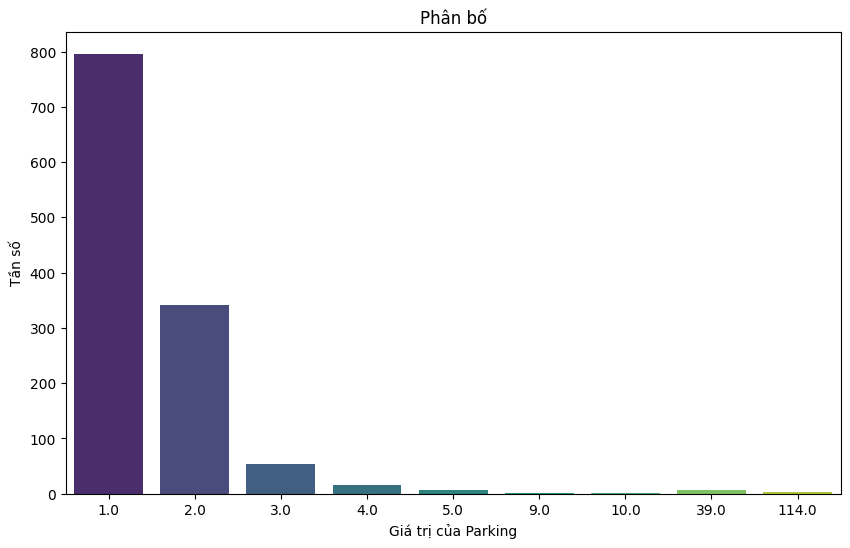

In [7]:
value_counts = df['Parking'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân bố')
plt.xlabel('Giá trị của Parking')
plt.ylabel('Tần số')

<ipython-input-63-8149534c16bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


Text(0, 0.5, 'Tần số')

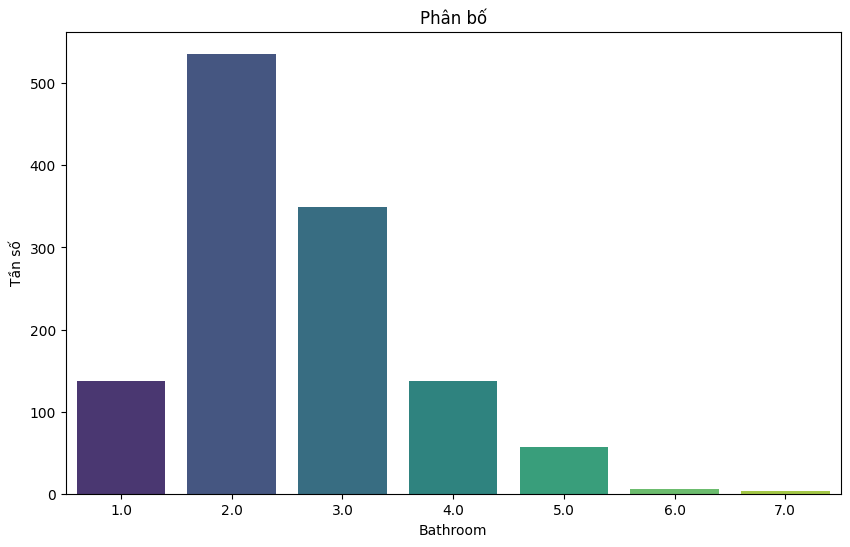

In [ ]:

value_counts = df['Bathroom'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân bố')
plt.xlabel('Bathroom')
plt.ylabel('Tần số')

<ipython-input-64-ae4f19b103bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


Text(0, 0.5, 'Tần số')

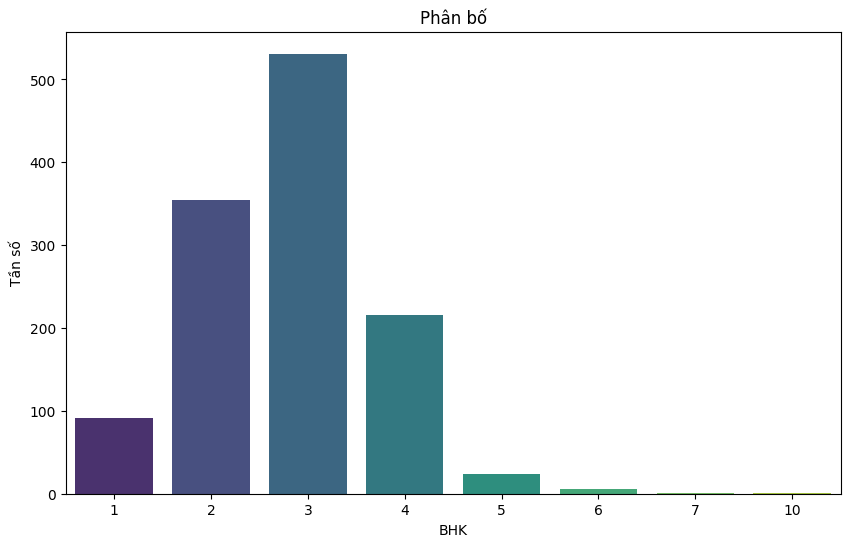

In [ ]:

value_counts = df['BHK'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân bố')
plt.xlabel('BHK')
plt.ylabel('Tần số')

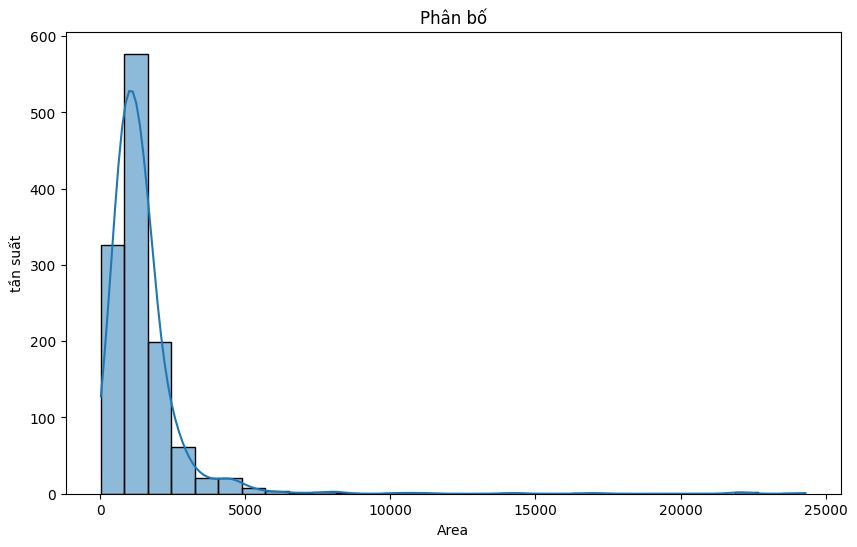

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Area'], kde=True, bins=30)

# Thêm tiêu đề và nhãn
plt.title('Phân bố')
plt.xlabel('Area')
plt.ylabel('tần suất')

plt.show()

<ipython-input-89-d0be2fec361c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


Text(0, 0.5, 'Tần số')

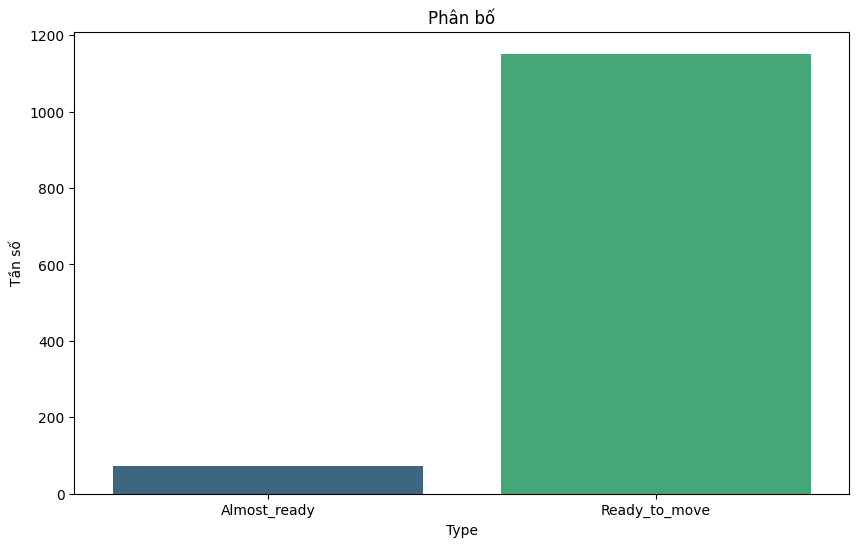

In [ ]:
value_counts = df['Status'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân bố')
plt.xlabel('Type')
plt.ylabel('Tần số')

<ipython-input-90-f5f8b80bc985>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


Text(0, 0.5, 'Tần số')

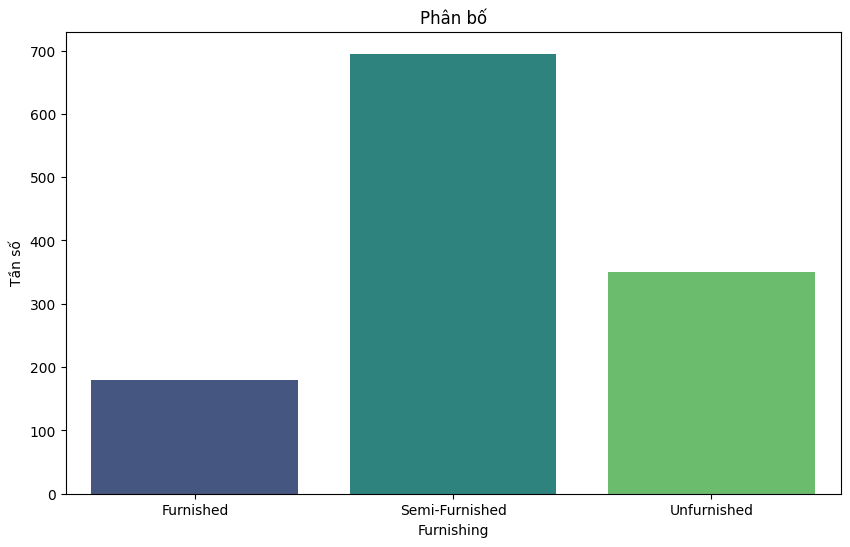

In [ ]:
value_counts = df['Furnishing'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân bố')
plt.xlabel('Furnishing')
plt.ylabel('Tần số')

In [ ]:
# Tạo từ điển ánh xạ
furnishing_mapping = {'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2}

# Áp dụng ánh xạ
df['Furnishing'] = df['Furnishing'].replace(furnishing_mapping)

# Xem kết quả
print(df)

         Area  BHK  Bathroom  Furnishing  Parking     Price         Status
0       800.0    3       2.0           1      1.0   6500000  Ready_to_move
1       750.0    2       2.0           1      1.0   5000000  Ready_to_move
2       950.0    2       2.0           2      1.0  15500000  Ready_to_move
3       600.0    2       2.0           1      1.0   4200000  Ready_to_move
4       650.0    2       2.0           1      1.0   6200000  Ready_to_move
...       ...  ...       ...         ...      ...       ...            ...
1254   4118.0    4       5.0           0      3.0  55000000  Ready_to_move
1255   1050.0    3       2.0           1      3.0  12500000  Ready_to_move
1256    875.0    3       3.0           1      3.0  17500000  Ready_to_move
1257    990.0    2       2.0           0      1.0  11500000  Ready_to_move
1258  11050.0    3       3.0           0      1.0  18500000  Ready_to_move

[1225 rows x 7 columns]


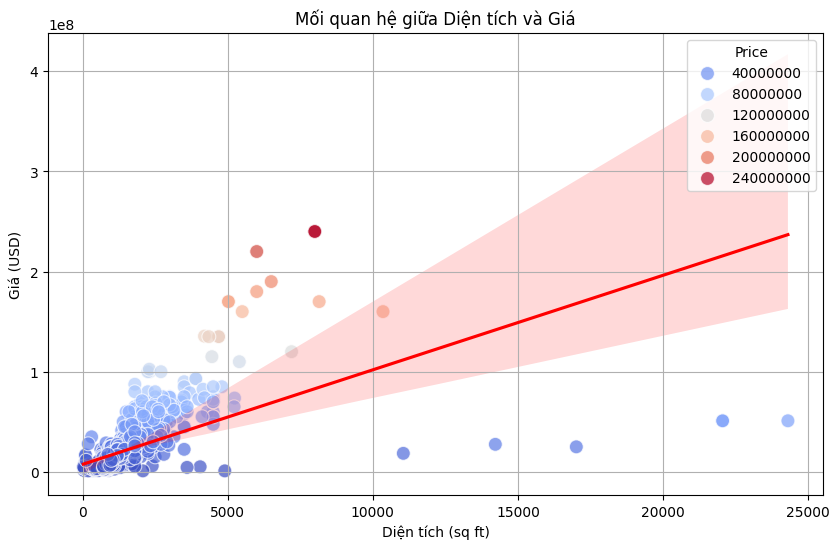

In [ ]:

# Vẽ biểu đồ đám mây với đường hồi quy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area', y='Price', hue='Price', palette='coolwarm', s=100, alpha=0.7)

# Thêm đường hồi quy
sns.regplot(data=df, x='Area', y='Price', scatter=False, color='red')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Mối quan hệ giữa Diện tích và Giá')
plt.xlabel('Diện tích (sq ft)')
plt.ylabel('Giá (USD)')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

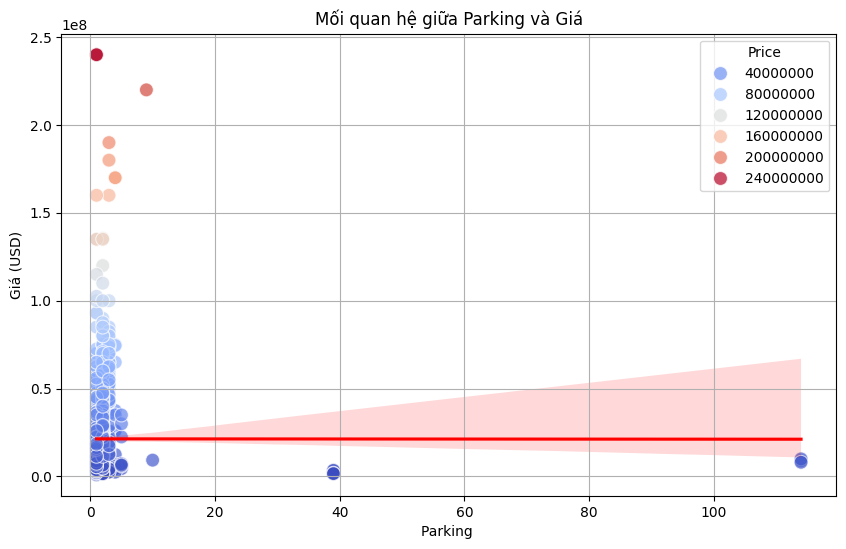

In [9]:

# Vẽ biểu đồ đám mây với đường hồi quy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Parking', y='Price', hue='Price', palette='coolwarm', s=100, alpha=0.7)

# Thêm đường hồi quy
sns.regplot(data=df, x='Parking', y='Price', scatter=False, color='red')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Mối quan hệ giữa Parking và Giá')
plt.xlabel('Parking ')
plt.ylabel('Giá (USD)')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

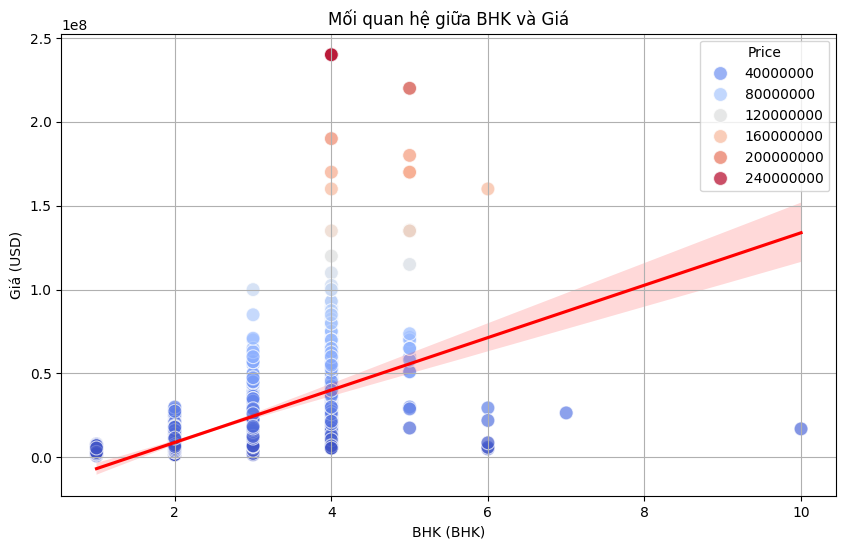

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BHK', y='Price', hue='Price', palette='coolwarm', s=100, alpha=0.7)

# Thêm đường hồi quy
sns.regplot(data=df, x='BHK', y='Price', scatter=False, color='red')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Mối quan hệ giữa BHK và Giá')
plt.xlabel('BHK (BHK)')
plt.ylabel('Giá (USD)')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

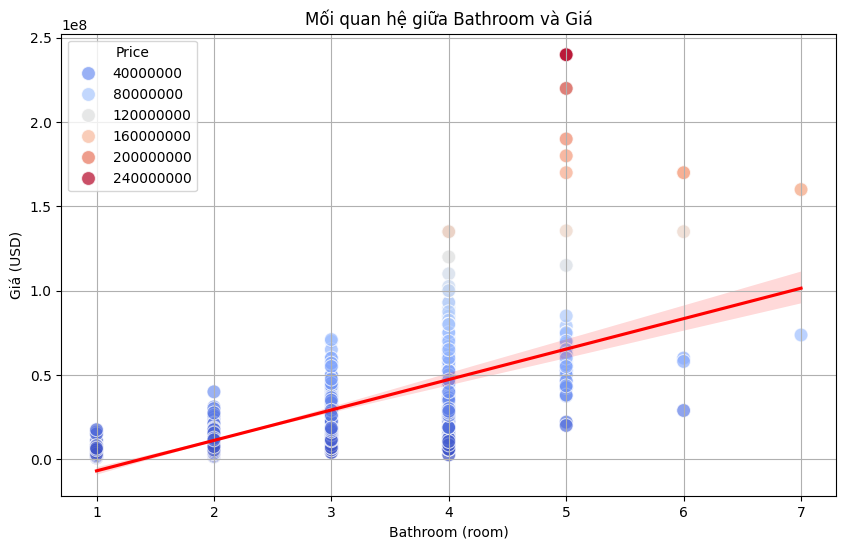

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bathroom', y='Price', hue='Price', palette='coolwarm', s=100, alpha=0.7)

# Thêm đường hồi quy
sns.regplot(data=df, x='Bathroom', y='Price', scatter=False, color='red')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Mối quan hệ giữa Bathroom và Giá')
plt.xlabel('Bathroom (room)')
plt.ylabel('Giá (USD)')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

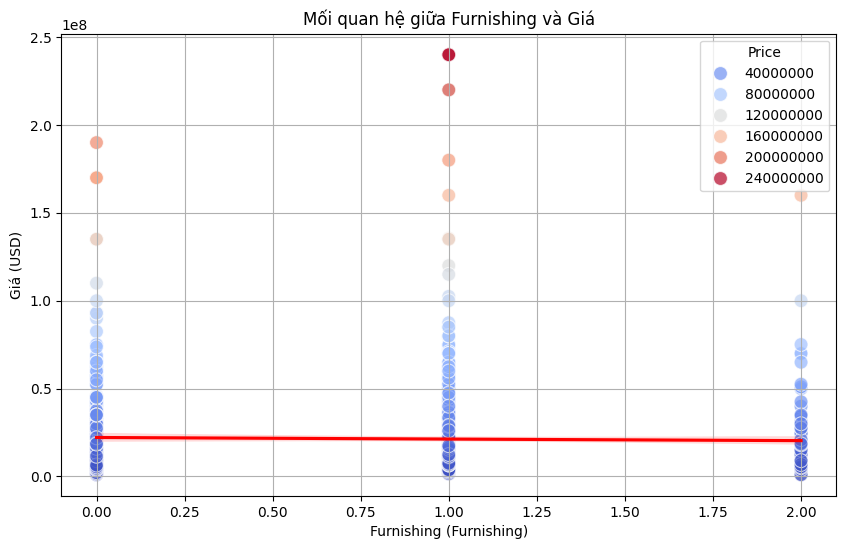

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Furnishing', y='Price', hue='Price', palette='coolwarm', s=100, alpha=0.7)
# Thêm đường hồi quy
sns.regplot(data=df, x='Furnishing', y='Price', scatter=False, color='red')
# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Mối quan hệ giữa Furnishing và Giá')
plt.xlabel('Furnishing (Furnishing)')
plt.ylabel('Giá (USD)')
# Hiển thị biểu đồ
plt.grid(True)
plt.show()

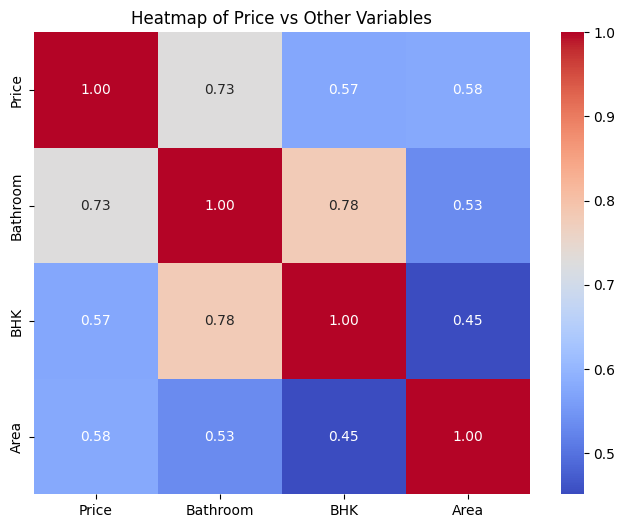

In [ ]:
# Tính toán ma trận tương quan
corr_matrix = df[['Price', 'Bathroom', 'BHK', 'Area']].corr()

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Price vs Other Variables')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

# Định nghĩa biến độc lập (X) và biến phụ thuộc (y)
X = df[['Bathroom', 'BHK', 'Area']]
y = df['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Size of training data: {X_train.shape[0]}")
print(f"Size of test data: {X_test.shape[0]}")

Size of training data: 980
Size of test data: 245


In [31]:
from sklearn.linear_model import LinearRegression

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình với dữ liệu huấn luyện
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 358335811810020.44
R^2 Score: 0.5742147385228933


In [ ]:
bathroom_input = float(input("nhập phòng tắm: "))
bhk_input = float(input("Nhập số phòng ngủ: "))
area_input = float(input("Nhập diện tích (m2): "))

# Tạo DataFrame với giá trị đầu vào
input_data = pd.DataFrame({
    'Bathroom': [bathroom_input],
    'BHK': [bhk_input],
    'Area': [area_input]
})

# Dự đoán giá nhà sử dụng mô hình
predicted_price = model.predict(input_data)

print(f"Giá dự đoán của ngôi nhà là: {predicted_price[0]:.2f}")
3


nhập phòng tắm: 3
Nhập số phòng ngủ: 3
Nhập diện tích (m2): 1540
Giá dự đoán của ngôi nhà là: 27810294.84


3